# Modeling and Evaluation
This notebook contains model training and evaluation for the yeast ML project.

## 1. Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV

%matplotlib inline

## 2. Load Prepared Data

In [2]:
# Load preprocessed training and testing data
train_data = pd.read_csv('preprocessed_train.csv')
test_data = pd.read_csv('preprocessed_test.csv')


## 3. Baseline Model

In [ ]:
# Establish a baseline model (e.g., majority class classifier)
baseline_accuracy = train_data['ProteinSite'].value_counts().max() / len(train_data)
print(f'Baseline Accuracy: {baseline_accuracy:.4f}')

Baseline Accuracy: 0.3088


## 4. Model Training and Evaluation

### 4.1 Decision Tree

#### 4.1.1 Train Decision Tree Model

In [9]:
# Initialize and train Decision Tree (drop SeqName and target)
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(train_data.drop(columns=['SeqName', 'ProteinSite']), train_data['ProteinSite'])

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#### 4.1.2 Evaluate Decision Tree Model

In [11]:
# Make predictions
dt_predictions = dt_classifier.predict(test_data.drop(columns=['SeqName', 'ProteinSite']))
dt_accuracy = accuracy_score(test_data['ProteinSite'], dt_predictions)
print(f'Decision Tree Accuracy: {dt_accuracy:.4f}')

Decision Tree Accuracy: 0.5324


In [13]:
# Evaluate metrics (accuracy, precision, recall, F1-score)
dt_precision = precision_score(test_data['ProteinSite'], dt_predictions, average='weighted', zero_division=0)
dt_recall = recall_score(test_data['ProteinSite'], dt_predictions, average='weighted', zero_division=0)
dt_f1 = f1_score(test_data['ProteinSite'], dt_predictions, average='weighted', zero_division=0)
print(f'Decision Tree Precision: {dt_precision:.4f}')
print(f'Decision Tree Recall: {dt_recall:.4f}')
print(f'Decision Tree F1-score: {dt_f1:.4f}')

Decision Tree Precision: 0.5436
Decision Tree Recall: 0.5324
Decision Tree F1-score: 0.5371


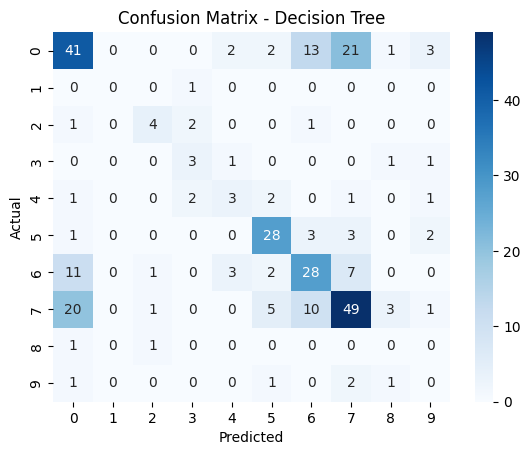

In [14]:
# Confusion matrix
cm = confusion_matrix(test_data['ProteinSite'], dt_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [15]:
# Classification report
print("Classification Report - Decision Tree")
print(classification_report(test_data['ProteinSite'], dt_predictions))

Classification Report - Decision Tree
              precision    recall  f1-score   support

         CYT       0.53      0.49      0.51        83
         ERL       0.00      0.00      0.00         1
         EXC       0.57      0.50      0.53         8
         ME1       0.38      0.50      0.43         6
         ME2       0.33      0.30      0.32        10
         ME3       0.70      0.76      0.73        37
         MIT       0.51      0.54      0.52        52
         NUC       0.59      0.55      0.57        89
         POX       0.00      0.00      0.00         2
         VAC       0.00      0.00      0.00         5

    accuracy                           0.53       293
   macro avg       0.36      0.36      0.36       293
weighted avg       0.54      0.53      0.54       293



c:\Users\Tulio\yeast-ML-project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Tulio\yeast-ML-project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Tulio\yeast-ML-project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result

#### 4.1.3 Hyperparameter Tuning - Decision Tree

In [17]:
# Grid search for hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(train_data.drop(columns=['SeqName', 'ProteinSite']), train_data['ProteinSite'])
print(f'Best parameters from Grid Search: {grid_search.best_params_}')

c:\Users\Tulio\yeast-ML-project\.venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best parameters from Grid Search: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


### 4.2 Naive Bayes

#### 4.2.1 Train Naive Bayes Model

In [ ]:
# Initialize and train Naive Bayes


#### 4.2.2 Evaluate Naive Bayes Model

In [ ]:
# Make predictions


In [ ]:
# Evaluate metrics (accuracy, precision, recall, F1-score)


In [ ]:
# Confusion matrix


In [ ]:
# Classification report


#### 4.2.3 Hyperparameter Tuning - Naive Bayes

In [ ]:
# Grid search for hyperparameter tuning


### 4.3 Logistic Regression

#### 4.3.1 Train Logistic Regression Model

In [ ]:
# Initialize and train Logistic Regression


#### 4.3.2 Evaluate Logistic Regression Model

In [ ]:
# Make predictions


In [ ]:
# Evaluate metrics (accuracy, precision, recall, F1-score)


In [ ]:
# Confusion matrix


In [ ]:
# Classification report


#### 4.3.3 Hyperparameter Tuning - Logistic Regression

In [ ]:
# Grid search for hyperparameter tuning


### 4.4 K-Nearest Neighbors (KNN)

#### 4.4.1 Train KNN Model

In [ ]:
# Initialize and train KNN


#### 4.4.2 Evaluate KNN Model

In [ ]:
# Make predictions


In [ ]:
# Evaluate metrics (accuracy, precision, recall, F1-score)


In [ ]:
# Confusion matrix


In [ ]:
# Classification report


#### 4.4.3 Hyperparameter Tuning - KNN

In [ ]:
# Grid search for hyperparameter tuning (finding optimal k)


### 4.5 Random Forest

#### 4.5.1 Train Random Forest Model

In [18]:
# Initialize and train Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(train_data.drop(columns=['SeqName', 'ProteinSite']), train_data['ProteinSite'])


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### 4.5.2 Evaluate Random Forest Model

In [ ]:
# Make predictions
rf_predictions = rf_classifier.predict(test_data.drop(columns=['SeqName', 'ProteinSite']))


In [23]:
# Evaluate metrics (accuracy, precision, recall, F1-score)
rf_precision = precision_score(test_data['ProteinSite'], rf_predictions, average='weighted', zero_division=0)
rf_recall = recall_score(test_data['ProteinSite'], rf_predictions, average='weighted', zero_division=0)
rf_f1 = f1_score(test_data['ProteinSite'], rf_predictions, average='weighted', zero_division=0)

print(f'Random Forest Precision: {rf_precision:.4f}')
print(f'Random Forest Recall: {rf_recall:.4f}')
print(f'Random Forest F1-score: {rf_f1:.4f}')

Random Forest Precision: 0.6383
Random Forest Recall: 0.6451
Random Forest F1-score: 0.6356


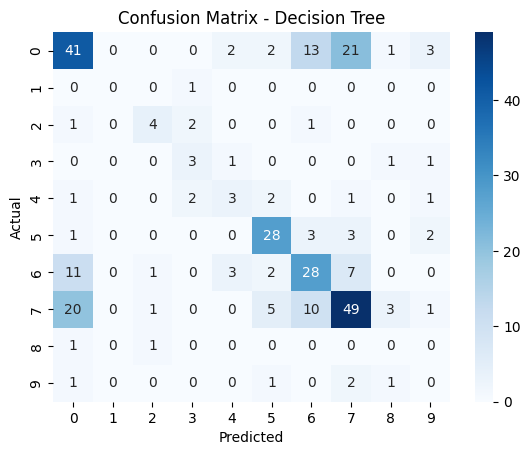

In [24]:
# Confusion matrix
cm = confusion_matrix(test_data['ProteinSite'], dt_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [26]:
# Classification report
print("Classification Report - Decision Tree")
print(classification_report(test_data['ProteinSite'], dt_predictions, zero_division=0))

Classification Report - Decision Tree
              precision    recall  f1-score   support

         CYT       0.53      0.49      0.51        83
         ERL       0.00      0.00      0.00         1
         EXC       0.57      0.50      0.53         8
         ME1       0.38      0.50      0.43         6
         ME2       0.33      0.30      0.32        10
         ME3       0.70      0.76      0.73        37
         MIT       0.51      0.54      0.52        52
         NUC       0.59      0.55      0.57        89
         POX       0.00      0.00      0.00         2
         VAC       0.00      0.00      0.00         5

    accuracy                           0.53       293
   macro avg       0.36      0.36      0.36       293
weighted avg       0.54      0.53      0.54       293



#### 4.5.3 Feature Importance - Random Forest

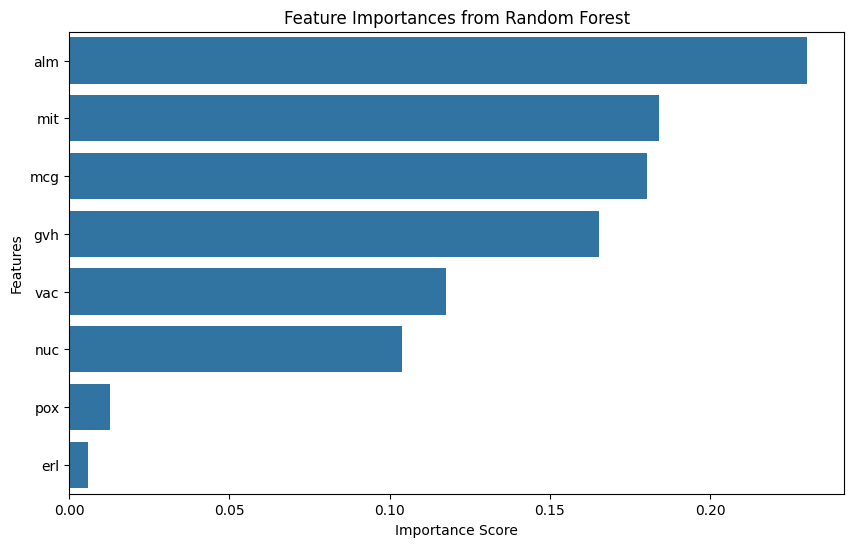

In [28]:
# Feature importance analysis
importances = rf_classifier.feature_importances_
feature_names = train_data.drop(columns=['SeqName', 'ProteinSite']).columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

#### 4.5.4 Hyperparameter Tuning - Random Forest

In [ ]:
# Grid search for hyperparameter tuning
# Grid search for hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(train_data.drop(columns=['SeqName', 'ProteinSite']), train_data['ProteinSite'])
print(f'Best parameters from Grid Search: {grid_search.best_params_}')

Best parameters from Grid Search: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


c:\Users\Tulio\yeast-ML-project\.venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


## 5. Model Comparison

### 5.1 Performance Comparison Table

In [32]:
# Create comparison table with all metrics


### 5.2 Visual Comparison

In [ ]:
# Bar plots comparing model performances


### 5.3 ROC Curves Comparison

In [ ]:
# Plot ROC curves for all models


## 6. Cross-Validation

In [ ]:
# Perform cross-validation for all models


## 7. Final Model Selection

In [ ]:
# Select the best performing model


## 8. Save Best Model

In [ ]:
# Save the final model using pickle or joblib


## 9. Conclusions and Recommendations

### Key findings:
- 
- 
- 

### Recommendations:
- 
- 
- 